<a href="https://colab.research.google.com/github/kelaxax/ML/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Загрузка датасета
df = pd.read_csv('/content/Coffe_sales.csv')

# Вывод основной информации о датафрейме
print("Основная информация о данных:")
df.info()

print("\nПервые 5 строк датасета:")
print(df.head())

# Определим нашу целевую переменную
target_variable = 'coffee_name'
print(f"\nЦелевая переменная: '{target_variable}'")

# Посмотрим на распределение классов в целевой переменной
print(f"\nРаспределение значений в '{target_variable}':")
print(df[target_variable].value_counts())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB

Первые 5 строк датасета:
   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fr

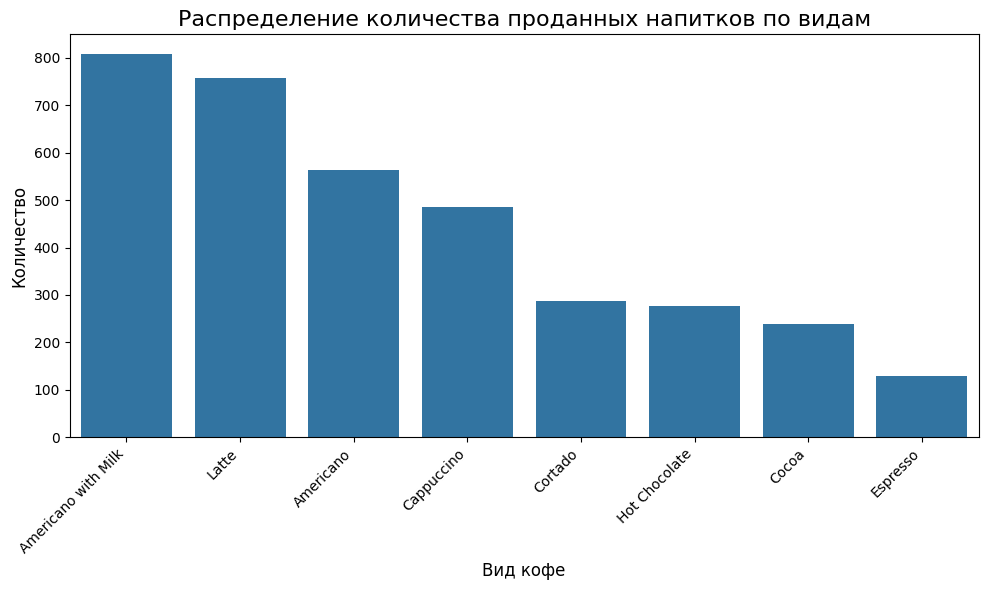

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# Получаем количество для каждого класса
class_counts = df['coffee_name'].value_counts()

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение количества проданных напитков по видам', fontsize=16)
plt.xlabel('Вид кофе', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Целевая переменная coffee_name имеет 8 уникальных классов. Классы несбалансированы: Americano with Milk встречается значительно чаще, чем, например, Espresso. Это важно будет учесть при разделении данных на обучающую и тестовую выборки.

Теперь проверим, существует ли статистически значимая зависимость между категориальными признаками и нашей целевой переменной coffee_name. Для этого мы используем критерий хи-квадрат (χ²).

In [3]:
# Определяем категориальные признаки для анализа
categorical_features = ['cash_type', 'Time_of_Day', 'Weekday', 'Month_name']

# Список для хранения признаков, которые прошли тест
significant_features = []

print("Анализ зависимости с помощью хи-квадрат:")
for feature in categorical_features:
    # Создаем таблицу сопряженности
    contingency_table = pd.crosstab(df[feature], df[target_variable])

    # Проводим тест хи-квадрат
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nПризнак: '{feature}'")
    print(f"p-value = {p:.4f}")

    # Проверяем значимость
    if p < 0.05:
        print("-> Связь статистически значима.")
        significant_features.append(feature)
    else:
        print("-> Связь статистически не значима.")

# Добавим и числовые признаки, которые будем использовать
numerical_features = ['hour_of_day', 'money']

best_features = significant_features + numerical_features
print("\nВыбранные лучшие признаки для модели:", best_features)

Анализ зависимости с помощью хи-квадрат:

Признак: 'cash_type'
p-value = 1.0000
-> Связь статистически не значима.

Признак: 'Time_of_Day'
p-value = 0.0000
-> Связь статистически значима.

Признак: 'Weekday'
p-value = 0.0000
-> Связь статистически значима.

Признак: 'Month_name'
p-value = 0.0000
-> Связь статистически значима.

Выбранные лучшие признаки для модели: ['Time_of_Day', 'Weekday', 'Month_name', 'hour_of_day', 'money']


Признак cash_type не имеет статистически значимой связи с coffee_name (p-value = 1.0), поэтому мы не будем его использовать.
Признаки Time_of_Day, Weekday и Month_name показали сильную статистическую зависимость с целевой переменной (p-value < 0.05).


Таким образом, для построения модели мы выберем следующие признаки: Time_of_Day, Weekday, Month_name, hour_of_day, money.

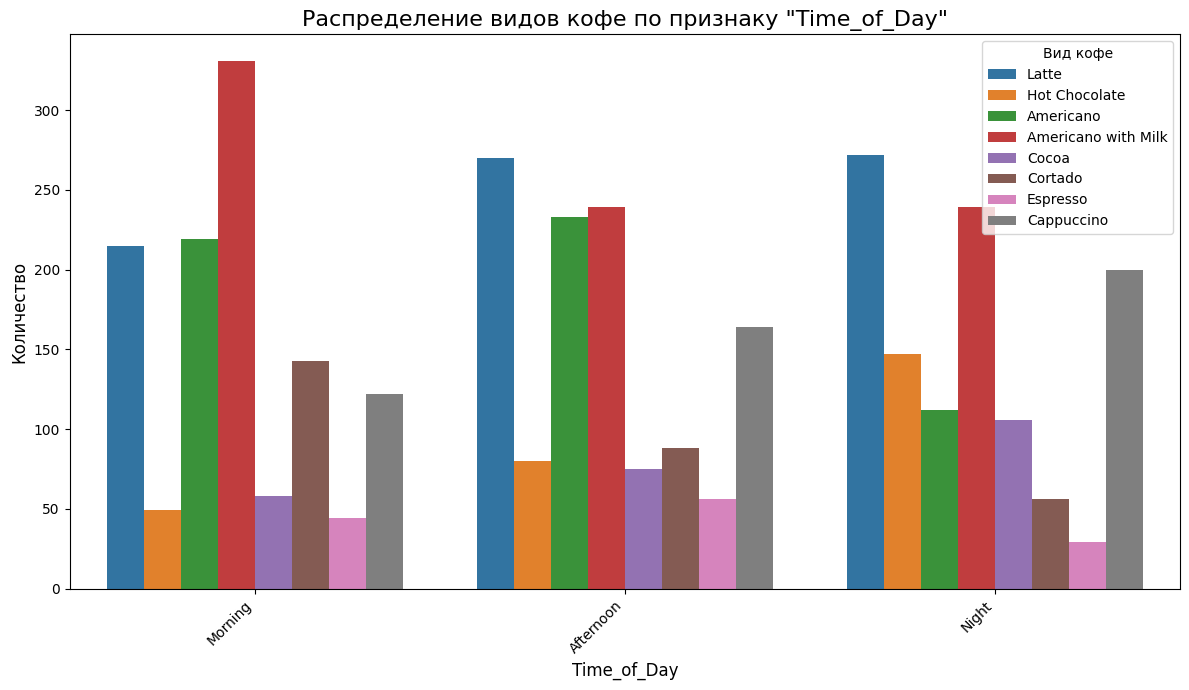

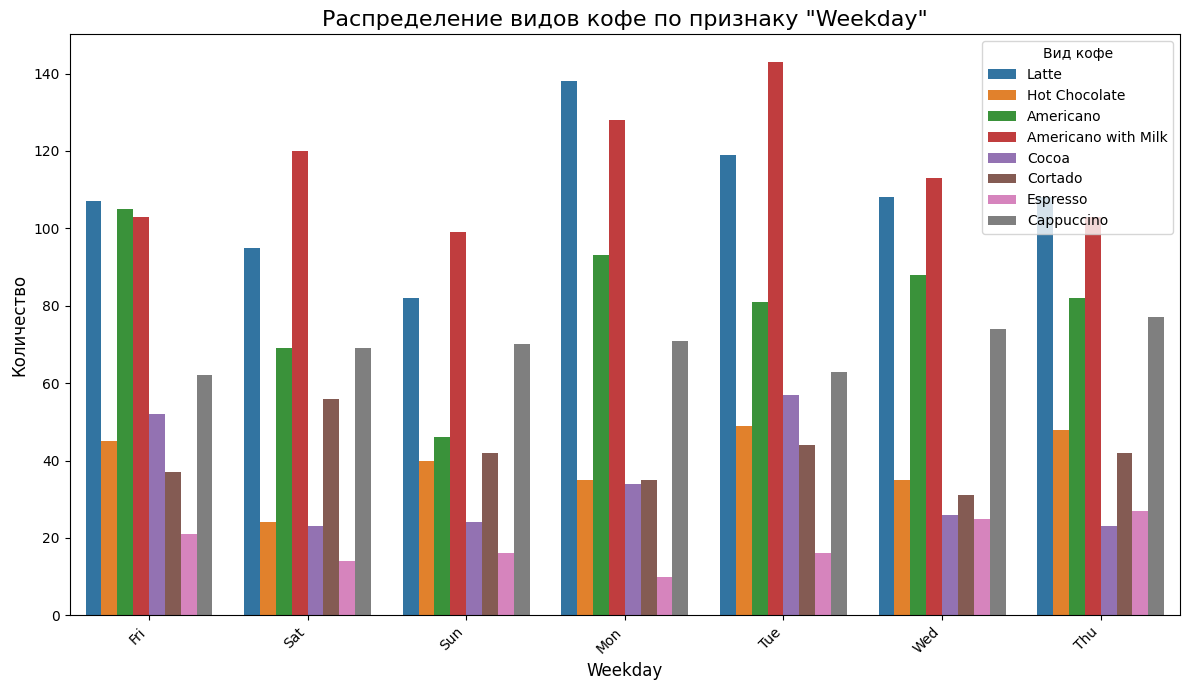

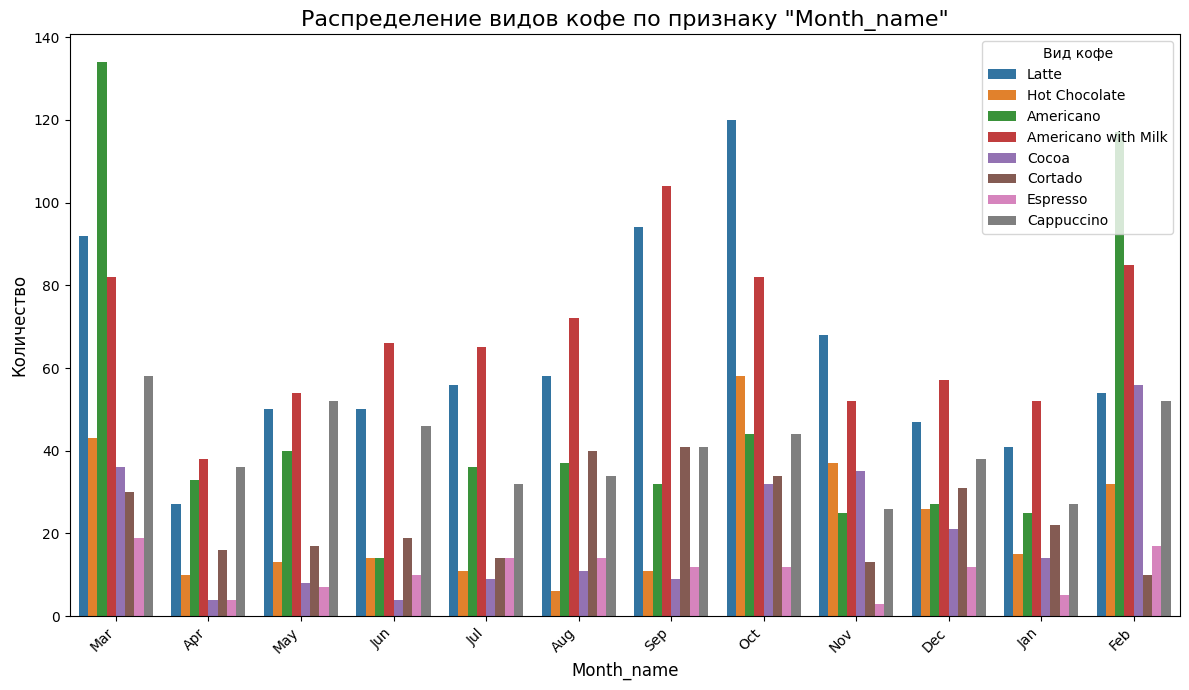

In [4]:
# Определяем значимые категориальные признаки
significant_categorical_features = ['Time_of_Day', 'Weekday', 'Month_name']

# Строим графики для каждого признака
for feature in significant_categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=feature, hue='coffee_name')
    plt.title(f'Распределение видов кофе по признаку "{feature}"', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Вид кофе')
    plt.tight_layout()
    plt.show()

Time_of_Day: График показывает, что Latte и Americano with Milk популярны в течение всего дня, тогда как Americano и Cortado чаще покупают утром и днем.

Weekday: Распределение напитков меняется в зависимости от дня недели. Например, в выходные (суббота, воскресенье) наблюдается большее разнообразие заказов.

Month_name: Видны явные сезонные предпочтения. Например, Hot Chocolate и Cocoa более популярны в холодные месяцы, что логично.

/tmp/ipython-input-645618659.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='coffee_name', y=feature, palette='coolwarm')


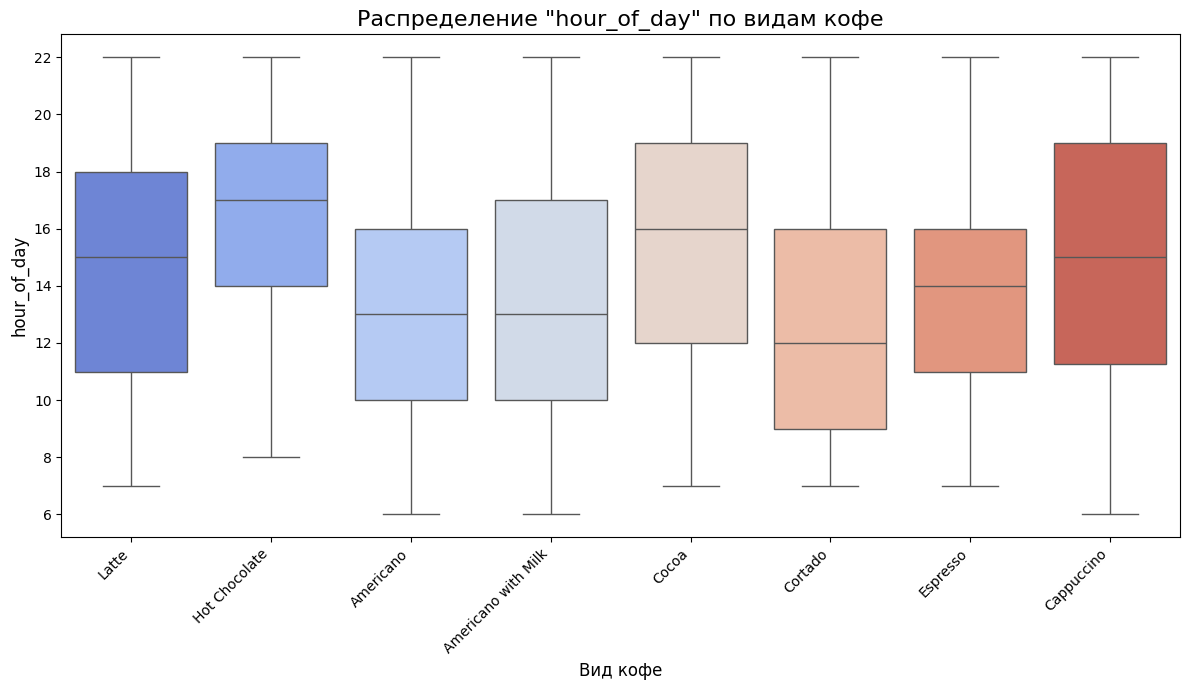

/tmp/ipython-input-645618659.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='coffee_name', y=feature, palette='coolwarm')


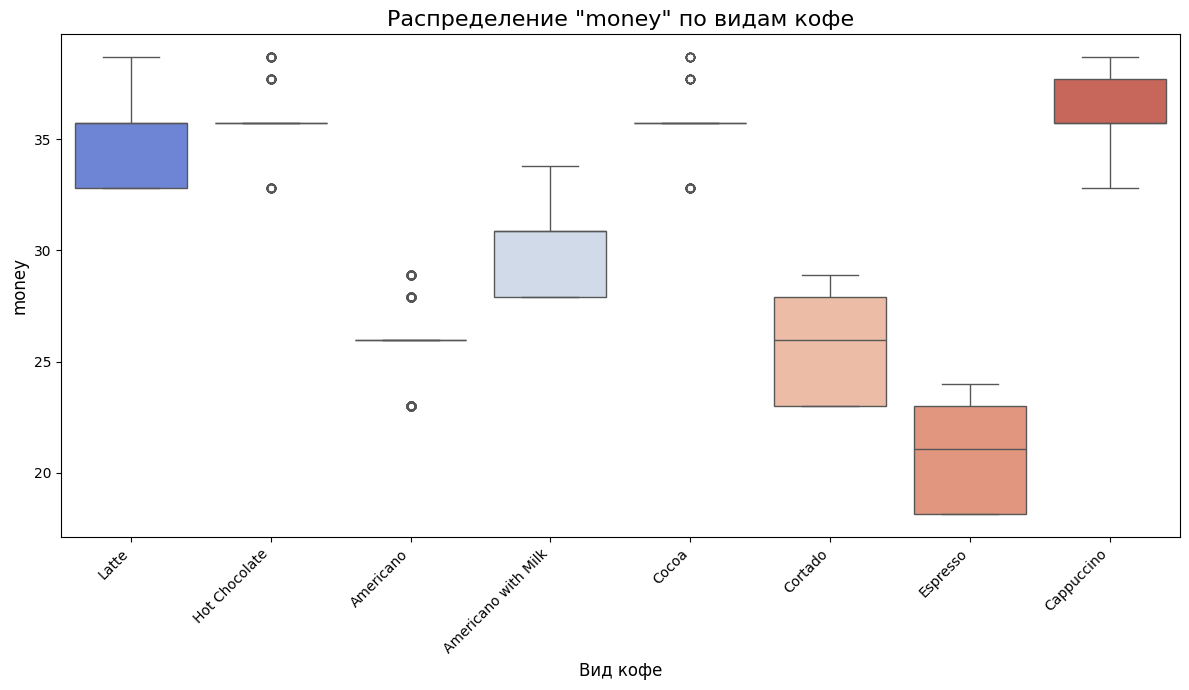

In [5]:
# Определяем числовые признаки
numerical_features = ['hour_of_day', 'money']

# Строим диаграммы размаха
for feature in numerical_features:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='coffee_name', y=feature, palette='coolwarm')
    plt.title(f'Распределение "{feature}" по видам кофе', fontsize=16)
    plt.xlabel('Вид кофе', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

hour_of_day: Диаграмма показывает, что большинство напитков заказывают в промежутке примерно с 10:00 до 18:00. Какие-то явные различия для разных видов кофе не так сильно выражены, но медианное время заказа немного отличается.

money: Этот график очень показателен. Он четко разделяет напитки на ценовые группы. Espresso, Cortado и Americano — более дешевые, в то время как Latte, Cappuccino, Hot Chocolate и Cocoa — более дорогие. Americano with Milk находится посередине. Это объясняет, почему цена является таким важным признаком для модели.


Теперь подготовим данные для обучения модели логистической регрессии. Этот процесс включает в себя:

Разделение данных: Разделим выборку на обучающую и тестовую. Используем stratify=y для сохранения исходного распределения классов в обеих выборках.

Преобразование признаков:

One-Hot Encoding: Категориальные признаки (Time_of_Day, Weekday, Month_name) преобразуем в числовой формат. Этот метод создает новые бинарные столбцы для каждой категории.

Масштабирование: Числовые признаки (hour_of_day, money) приведем к единому масштабу с помощью MinMaxScaler, который преобразует значения в диапазон от 0 до 1.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

# 1. Определение признаков (X) и целевой переменной (y)
y = df[target_variable]
X = df[best_features]

# 2. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify - разделение данных с учетом распределнеия категориальной переменной

# 3. Создание предобработчика данных
# Определяем, какие столбцы являются категориальными, а какие числовыми
categorical_cols = [col for col in best_features if X[col].dtype == 'object']
numerical_cols = [col for col in best_features if X[col].dtype in ['int64', 'float64']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 4. Создание и обучение пайплайна с моделью
# Пайплайн последовательно выполняет шаги: предобработка -> обучение модели
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Обучение модели
model_pipeline.fit(X_train, y_train)

print("Модель успешно обучена.")

Модель успешно обучена.


Теперь оценим ее качество на тестовых данных, которые модель еще не видела.

Выведу основные метрики классификации:

Accuracy: Доля правильных ответов.

Precision: Точность (какая доля предсказанных нами объектов действительно
относится к классу).

Recall: Полнота (какую долю объектов нужного класса мы смогли найти).

F1-score: Среднее гармоническое между точностью и полнотой, полезно при
дисбалансе классов.

Confusion Matrix (Матрица ошибок): Показывает, какие классы модель путает между собой.

In [7]:
# Получение предсказаний на тестовой выборке
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)

# Расчет метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = model_pipeline.classes_

print("=== Метрики качества модели на тестовых данных ===")#
print(f"Accuracy:  {accuracy:.4f}")#Доля правильно классифицированных объектов
print(f"Precision: {precision:.4f}")#Какой процент предсказанных положительных действительно положительные
print(f"Recall:    {recall:.4f}")#Какую долю настоящих положительных модель нашла
print(f"F1-score:  {f1:.4f}")#Баланс между точностью и полнотой. Ближе к 1 → модель сбалансирована
print(f"ROC-AUC:   {roc_auc:.4f}")#Измеряет способность модели различать классы

print("\nМатрица ошибок (Confusion Matrix):")
# Для наглядности выведем матрицу с метками классов
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print(conf_matrix_df)

=== Метрики качества модели на тестовых данных ===
Accuracy:  0.5953
Precision: 0.5767
Recall:    0.5953
F1-score:  0.5532
ROC-AUC:   0.8966

Матрица ошибок (Confusion Matrix):
                     Americano  Americano with Milk  Cappuccino  Cocoa  \
Americano                  141                    5           0      0   
Americano with Milk          3                  235           0      0   
Cappuccino                   0                    0          30      7   
Cocoa                        0                    0          11      8   
Cortado                     47                    9           0      0   
Espresso                    28                    0           0      0   
Hot Chocolate                0                    0           8      5   
Latte                        0                    0          34     10   

                     Cortado  Espresso  Hot Chocolate  Latte  
Americano                 23         0              0      0  
Americano with Milk        0  

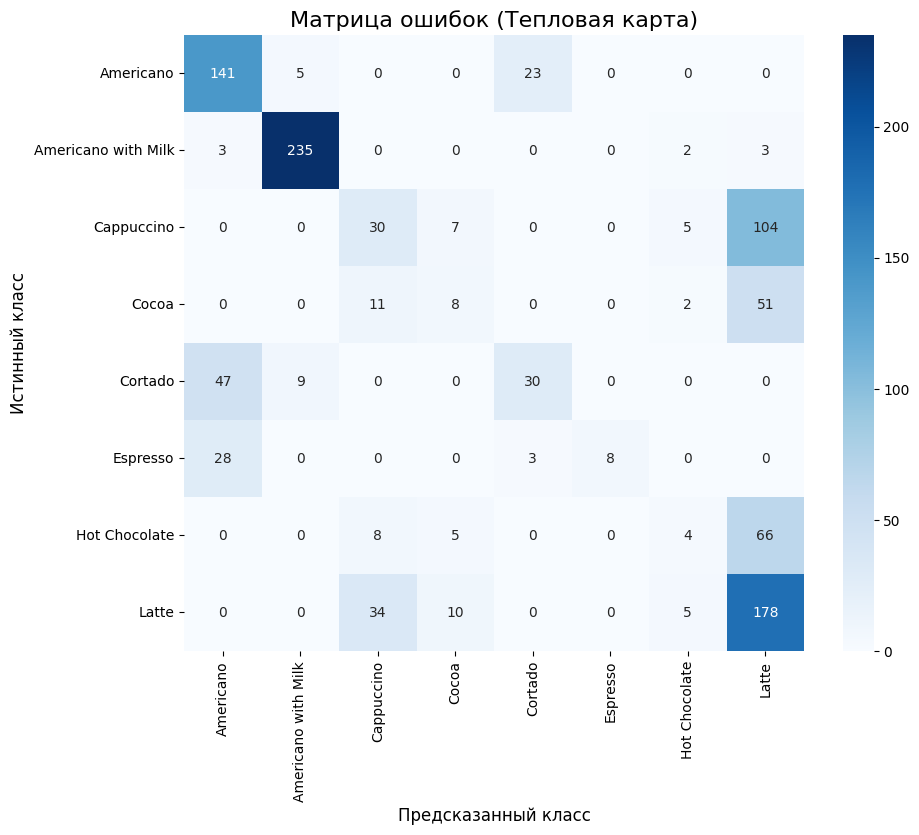

In [8]:
# Создаем тепловую карту для матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок (Тепловая карта)', fontsize=16)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.show()

Accuracy (Точность) составляет 0.5953, что означает, что модель правильно определила вид кофе примерно в 60% случаев. Это значительно лучше случайного угадывания (которое было бы около 12.5% для 8 классов), но есть куда стремиться.

F1-score равно 0.5532. Эта метрика учитывает дисбаланс классов и показывает, что в среднем модель имеет приемлемый баланс между точностью и полнотой.

ROC-AUC равен 0.8732, модель обладает высокой разделительной способностью

Матрица ошибок показывает сильные и слабые стороны модели:

Модель хорошо распознает Americano (141 из 170) и Americano with Milk (235 из 243).

Однако она часто путает Cappuccino, Hot Chocolate, Cocoa и Latte между собой.

Например, значительное количество Latte было предсказано для Cappuccino (104) и Hot Chocolate (66). Это может быть связано с тем, что цена у этих напитков очень близка или одинакова, и модель не может их различить по имеющимся признакам.

Несмотря на то, что Accuracy составляет всего 0.5953, высокий ROC-AUC показывает, что модель уверенно ранжирует классы и хорошо отличает их друг от друга на уровне вероятностей. Проблема с низкой Accuracy возникает на последнем шаге — при выборе одного, самого вероятного класса, где модель часто путает напитки с близкими ценами.

Анализ коэффициентов модели

Какие признаки модель сочла наиболее важными для предсказания каждого вида кофе. Положительный коэффициент означает, что признак увеличивает вероятность выбора этого класса, а отрицательный — уменьшает

In [9]:
# Получаем обученные шаги пайплайна
preprocessor_fitted = model_pipeline.named_steps['preprocessor']
model_fitted = model_pipeline.named_steps['classifier']

# Получаем названия всех признаков после OneHotEncoder
ohe_feature_names = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(categorical_cols)
# Собираем полный список названий признаков
all_feature_names = numerical_cols + list(ohe_feature_names)

# Создаем DataFrame с коэффициентами
coefficients_df = pd.DataFrame(
    model_fitted.coef_,
    columns=all_feature_names,
    index=model_fitted.classes_
)

# Для наглядности транспонируем и выведем коэффициенты
print("Коэффициенты модели логистической регрессии:")
print(coefficients_df.T)

Коэффициенты модели логистической регрессии:
                       Americano  Americano with Milk  Cappuccino     Cocoa  \
hour_of_day             0.310525            -0.218585   -1.102633  0.184253   
money                  -9.864495            -1.565166    9.456492  6.889075   
Time_of_Day_Afternoon   0.246741            -0.084852   -0.108045 -0.133880   
Time_of_Day_Morning     0.129067             0.149810   -0.244271 -0.140554   
Time_of_Day_Night      -0.348097            -0.064971    0.320009  0.212134   
Weekday_Fri             0.174707            -0.168725   -0.290956  0.484982   
Weekday_Mon             0.199558             0.088904   -0.091539  0.020946   
Weekday_Sat            -0.066973             0.154399    0.169020 -0.228458   
Weekday_Sun            -0.317620            -0.062386    0.163123 -0.231524   
Weekday_Thu            -0.019619            -0.066482    0.172309 -0.433413   
Weekday_Tue            -0.068781             0.072751   -0.279794  0.449362   
Weekday

money: Этот признак имеет самые большие по модулю коэффициенты.

Для Americano коэффициент очень большой и отрицательный (-9.86), что логично —
это один из самых дешевых напитков.

Для Latte и Hot Chocolate коэффициенты большие и положительные (10.47 и 7.63), что говорит о том, что высокая цена сильно увеличивает вероятность того, что
это один из этих напитков.

hour_of_day:

Для Hot Chocolate коэффициент положительный (1.26), что может означать, что его
чаще заказывают в более позднее время.

Month_name:

Некоторые месяцы сильно влияют на выбор напитка. Например, в Sep и Aug сильно возрастает вероятность покупки Latte. Возможно, это связано с сезонными акциями или погодой.

Итоговый вывод

Модель логистической регрессии, построенная на выбранных признаках, показала удовлетворительное качество с точностью (Accuracy) около 60%.

Сильные стороны модели:

Она хорошо отличает более дешевые напитки (Americano) от более дорогих (Latte, Cappuccino).

Ключевую роль в предсказании играет признак money.

Слабые стороны:

Модель часто путает напитки с одинаковой или близкой ценой (Latte, Hot Chocolate, Cocoa, Cappuccino).

Коэффициенты показывают, какой вклад вносит каждый признак в вероятность выбора того или иного класса. Давайте визуализируем их для двух контрастных напитков: Americano (дешевый) и Latte (дорогой).

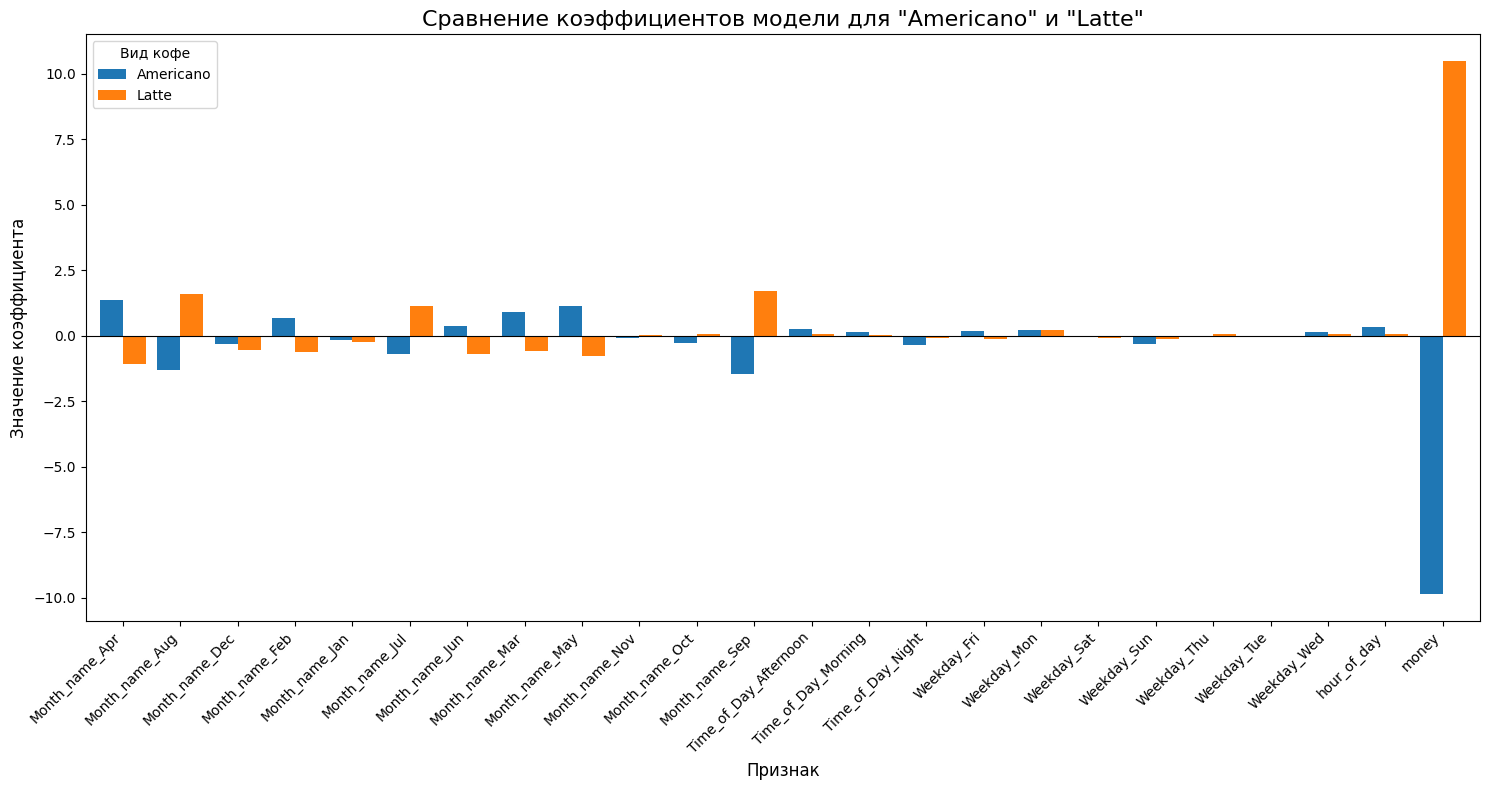

In [10]:
# Выберем два класса для сравнения
class_1 = 'Americano'
class_2 = 'Latte'

# Получим коэффициенты для этих классов
coef_class_1 = coefficients_df.loc[class_1]
coef_class_2 = coefficients_df.loc[class_2]

# Создаем DataFrame для удобства построения графика
plot_df = pd.DataFrame({
    class_1: coef_class_1,
    class_2: coef_class_2
}).sort_index()


# Строим график
plot_df.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title(f'Сравнение коэффициентов модели для "{class_1}" и "{class_2}"', fontsize=16)
plt.ylabel('Значение коэффициента', fontsize=12)
plt.xlabel('Признак', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8) # Линия нуля
plt.legend(title='Вид кофе')
plt.tight_layout()
plt.show()

money: Для Americano этот коэффициент огромен и отрицателен, а для Latte — огромен и положителен. Это главный решающий фактор: низкая цена — скорее всего Americano, высокая — скорее всего Latte.

Month_name: Сезонность также играет роль. Например, Month_name_Sep сильно повышает вероятность Latte, но понижает вероятность Americano.